<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

## Problem Statement

From Rainfall to Mosquito borne diseases: Understanding the Chain Reaction.

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

In summary :

Understanding the relationship between rainfall and the incidence of mosquito-borne diseases like dengue is crucial for public health planning in Singapore. This study aims to analyze the correlation between these two variables.

In the context of climate change, the planet is inevitably warming up due to urbanization efforts from all over the world which leads to rising sea levels, a warmer climate and in this analysis, it affects the life cycle of mosquitoes as well.

According to a Bard blog source "https://www.bard.edu/cep/blog/?p=8199", warmer temperatures with high humidity accelerates the rate of mosquito development and decrease their mortality rate. 



### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def calculate_mean(numbers):
    total_sum = sum(numbers)
    mean_value = total_sum / len(numbers)
    return mean_value
test_numbers = [3, 9, 3, 9,] # 3, 9 because its DSI 39:D

In [2]:
calculate_mean(test_numbers)

6.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
# Function to manually calculate standard deviation
def std_deviation(numbers):
    mean_value = calculate_mean(numbers) 
    n = len(numbers)
    sum_of_squared_diff = sum((x - mean_value)**2 for x in numbers)
    std_dev = (sum_of_squared_diff / n) ** 0.5
    return std_dev


std_deviation_result = std_deviation(test_numbers)
std_deviation_result



3.0

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd # for map overlay between dengue + rainfall
import numpy as np


## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
rainfall_highest_daily_total_df = pd.read_csv(r'..\data\rainfall-monthly-highest-daily-total.csv')
rainfall_number_of_rain_days_df = pd.read_csv(r'..\data\rainfall-monthly-number-of-rain-days.csv')
rainfall_monthly_total_df = pd.read_csv(r'..\data\rainfall-monthly-total.csv')
dengue_clusters_gdf = gpd.read_file(r'..\data\DengueClustersGEOJSON.geojson')
dengue_cases_df = pd.read_csv(r'..\data\dengue_cases.csv')

In [6]:
# Step 1: Display the first 5 rows of each DataFrame
print("First 5 rows of Rainfall Highest Daily Total:")
print(rainfall_highest_daily_total_df.head())

print("\nFirst 5 rows of Rainfall Number of Rain Days:")
print(rainfall_number_of_rain_days_df.head())

print("\nFirst 5 rows of Rainfall Monthly Total:")
print(rainfall_monthly_total_df.head())

print("\nFirst 5 rows of Dengue Cases:")
print(dengue_cases_df.head())



First 5 rows of Rainfall Highest Daily Total:
     month  maximum_rainfall_in_a_day
0  1982-01                       36.5
1  1982-02                        9.4
2  1982-03                       61.7
3  1982-04                       45.1
4  1982-05                       33.0

First 5 rows of Rainfall Number of Rain Days:
     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10

First 5 rows of Rainfall Monthly Total:
     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2

First 5 rows of Dengue Cases:
   Year  Dengue_Fever
0  2012          4632
1  2013         22170
2  2014         18326
3  2015         11294
4  2016         13085


In [7]:
# Step 2: Check for missing values and data types
# Create dictionaries to store missing values and data types information
missing_values_info = {}
data_types_info = {}

# Loop through all DataFrames to get missing values and data types information
for df_name, df in zip(['rainfall_highest_daily_total_df', 'rainfall_number_of_rain_days_df', 'rainfall_monthly_total_df', 'dengue_clusters_gdf', 'dengue_cases_df'],
                       [rainfall_highest_daily_total_df, rainfall_number_of_rain_days_df, rainfall_monthly_total_df, dengue_clusters_gdf, dengue_cases_df]):
    
    # Check for missing values and store them in the dictionary
    missing_values_info[df_name] = df.isnull().sum()
    
    # Check data types and store them in the dictionary
    data_types_info[df_name] = df.dtypes

# Print the missing values and data types information
print("Missing Values Information:")
for key, value in missing_values_info.items():
    print(f"{key}:\n{value}\n")

print("Data Types Information:")
for key, value in data_types_info.items():
    print(f"{key}:\n{value}\n")


Missing Values Information:
rainfall_highest_daily_total_df:
month                        0
maximum_rainfall_in_a_day    0
dtype: int64

rainfall_number_of_rain_days_df:
month               0
no_of_rainy_days    0
dtype: int64

rainfall_monthly_total_df:
month             0
total_rainfall    0
dtype: int64

dengue_clusters_gdf:
Name           0
Description    0
geometry       0
dtype: int64

dengue_cases_df:
Year            0
Dengue_Fever    0
dtype: int64

Data Types Information:
rainfall_highest_daily_total_df:
month                         object
maximum_rainfall_in_a_day    float64
dtype: object

rainfall_number_of_rain_days_df:
month               object
no_of_rainy_days     int64
dtype: object

rainfall_monthly_total_df:
month              object
total_rainfall    float64
dtype: object

dengue_clusters_gdf:
Name             object
Description      object
geometry       geometry
dtype: object

dengue_cases_df:
Year            int64
Dengue_Fever    int64
dtype: object



In [8]:
# Step 3: Check for any obvious issues with the observations

# Create a dictionary to store issues found
obvious_issues = {}

# Check for negative values in numerical columns and date inconsistencies
for df_name, df in zip(['rainfall_highest_daily_total_df', 'rainfall_number_of_rain_days_df', 'rainfall_monthly_total_df', 'dengue_cases_df'],
                       [rainfall_highest_daily_total_df, rainfall_number_of_rain_days_df, rainfall_monthly_total_df, dengue_cases_df]):

    issues = []
    
    # Check for negative values in numerical columns
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        if df[col].lt(0).any():
            issues.append(f"Negative values found in column '{col}'")
            
    # Check for date inconsistencies in 'month' and 'Year' columns (if present)
    if 'month' in df.columns:
        try:
            pd.to_datetime(df['month'])
        except Exception as e:
            issues.append(f"Date inconsistencies found in 'month' column: {str(e)}")
            
    if 'Year' in df.columns:
        if df['Year'].lt(1900).any() or df['Year'].gt(2100).any():
            issues.append("Unrealistic years found in 'Year' column")
    
    obvious_issues[df_name] = issues if issues else "No obvious issues found"

obvious_issues


{'rainfall_highest_daily_total_df': 'No obvious issues found',
 'rainfall_number_of_rain_days_df': 'No obvious issues found',
 'rainfall_monthly_total_df': 'No obvious issues found',
 'dengue_cases_df': 'No obvious issues found'}

In [9]:
# Step 4 : Fix any errors identified in step 2-3~

# List of DataFrames that need the 'month' column converted
dfs_to_convert = [rainfall_highest_daily_total_df, rainfall_number_of_rain_days_df, rainfall_monthly_total_df]

# Convert 'month' to datetime and add 'year' and 'month_only' columns
for df in dfs_to_convert:
    df['month'] = pd.to_datetime(df['month'])
    df['year'] = df['month'].dt.year
    df['month_only'] = df['month'].dt.month

# Confirm data types are as expected
for df in dfs_to_convert:
    print(df.dtypes)
    print()



month                        datetime64[ns]
maximum_rainfall_in_a_day           float64
year                                  int64
month_only                            int64
dtype: object

month               datetime64[ns]
no_of_rainy_days             int64
year                         int64
month_only                   int64
dtype: object

month             datetime64[ns]
total_rainfall           float64
year                       int64
month_only                 int64
dtype: object



In [10]:
# Step 5: Fix Any Incorrect Data Types
# No datatypes needs to be fixed
# Confirm that no data types need to be fixed
data_types_check_step5 = {df_name: df.dtypes for df_name, df in zip(
    ['rainfall_highest_daily_total_df', 'rainfall_number_of_rain_days_df', 'rainfall_monthly_total_df', 'dengue_cases_df'],
    [rainfall_highest_daily_total_df, rainfall_number_of_rain_days_df, rainfall_monthly_total_df, dengue_cases_df]
)}

data_types_check_step5



{'rainfall_highest_daily_total_df': month                        datetime64[ns]
 maximum_rainfall_in_a_day           float64
 year                                  int64
 month_only                            int64
 dtype: object,
 'rainfall_number_of_rain_days_df': month               datetime64[ns]
 no_of_rainy_days             int64
 year                         int64
 month_only                   int64
 dtype: object,
 'rainfall_monthly_total_df': month             datetime64[ns]
 total_rainfall           float64
 year                       int64
 month_only                 int64
 dtype: object,
 'dengue_cases_df': Year            int64
 Dengue_Fever    int64
 dtype: object}

In [11]:
# Step 6: Rename Columns

# Rename columns for the rainfall and dengue DataFrames to be all lowercase and have underscores instead of spaces
for df in [rainfall_highest_daily_total_df, rainfall_number_of_rain_days_df, rainfall_monthly_total_df, dengue_cases_df]:
    df.columns = df.columns.str.lower().str.replace(' ', '_')

# Confirm that columns have been renamed as expected
renamed_columns = {df_name: df.columns.tolist() for df_name, df in zip(
    ['rainfall_highest_daily_total_df', 'rainfall_number_of_rain_days_df', 'rainfall_monthly_total_df', 'dengue_cases_df'],
    [rainfall_highest_daily_total_df, rainfall_number_of_rain_days_df, rainfall_monthly_total_df, dengue_cases_df]
)}

renamed_columns



{'rainfall_highest_daily_total_df': ['month',
  'maximum_rainfall_in_a_day',
  'year',
  'month_only'],
 'rainfall_number_of_rain_days_df': ['month',
  'no_of_rainy_days',
  'year',
  'month_only'],
 'rainfall_monthly_total_df': ['month',
  'total_rainfall',
  'year',
  'month_only'],
 'dengue_cases_df': ['year', 'dengue_fever']}

In [12]:
# Step 7: Drop Unnecessary Rows (If Needed)

# For this dataset, we assume that all rows are necessary for the analysis.

# In this case, no rows are dropped because:
# 1. There are no missing or inconsistent data.
# 2. All the years and months in the dataset are within the expected range.
# 3. No negative or unrealistic values were found in numerical columns.

# Confirm that no rows are dropped
rows_count_check = {df_name: df.shape[0] for df_name, df in zip(
    ['rainfall_highest_daily_total_df', 'rainfall_number_of_rain_days_df', 'rainfall_monthly_total_df', 'dengue_cases_df'],
    [rainfall_highest_daily_total_df, rainfall_number_of_rain_days_df, rainfall_monthly_total_df, dengue_cases_df]
)}

rows_count_check


{'rainfall_highest_daily_total_df': 491,
 'rainfall_number_of_rain_days_df': 488,
 'rainfall_monthly_total_df': 488,
 'dengue_cases_df': 10}

In [13]:
# Step 8: Merge DataFrames That Can Be Merged

# Merging the rainfall DataFrames into one single DataFrame for easier analysis
# Merge them on the 'month', 'year', and 'month_only' columns
merged_rainfall_df = pd.merge(rainfall_highest_daily_total_df, rainfall_number_of_rain_days_df, 
                              on=['month', 'year', 'month_only'], how='outer')

merged_rainfall_df = pd.merge(merged_rainfall_df, rainfall_monthly_total_df, 
                              on=['month', 'year', 'month_only'], how='outer')

# Confirm that the DataFrames have been successfully merged
merged_rainfall_df.head(), merged_rainfall_df.dtypes


(       month  maximum_rainfall_in_a_day  year  month_only  no_of_rainy_days  \
 0 1982-01-01                       36.5  1982           1              10.0   
 1 1982-02-01                        9.4  1982           2               5.0   
 2 1982-03-01                       61.7  1982           3              11.0   
 3 1982-04-01                       45.1  1982           4              14.0   
 4 1982-05-01                       33.0  1982           5              10.0   
 
    total_rainfall  
 0           107.1  
 1            27.8  
 2           160.8  
 3           157.0  
 4           102.2  ,
 month                        datetime64[ns]
 maximum_rainfall_in_a_day           float64
 year                                  int64
 month_only                            int64
 no_of_rainy_days                    float64
 total_rainfall                      float64
 dtype: object)

In [14]:
# Step 9: Perform Any Additional Cleaning That You Feel Is Necessary

# In our case, the data already appears to be clean and ready for analysis.
# let's just confirm that no additional cleaning is required
additional_cleaning_check = {df_name: df.isnull().sum() for df_name, df in zip(
    ['merged_rainfall_df', 'dengue_cases_df'],
    [merged_rainfall_df, dengue_cases_df]
)}

additional_cleaning_check


{'merged_rainfall_df': month                        0
 maximum_rainfall_in_a_day    0
 year                         0
 month_only                   0
 no_of_rainy_days             3
 total_rainfall               3
 dtype: int64,
 'dengue_cases_df': year            0
 dengue_fever    0
 dtype: int64}

In [15]:
# Save the cleaned and merged rainfall DataFrame
merged_rainfall_df.to_csv(r'..\data\cleaned_merged_rainfall.csv', index=False)

# Save the cleaned dengue cases DataFrame
dengue_cases_df.to_csv(r'..\data\cleaned_dengue_cases.csv', index=False)


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

Rainfall data (`cleaned_merged_rainfall.csv`)

| Feature              | Type        | Dataset       | Description                                                |
|---------------------|-------------|---------------|------------------------------------------------------------|
| `month`              | datetime64  | Rainfall Data | The month and year of the recorded data                     |
| `year`               | integer     | Rainfall Data | The year of the recorded data                               |
| `month_only`         | integer     | Rainfall Data | The month (1-12) of the recorded data                       |
| `max_rainfall_in_a_day` | float64  | Rainfall Data | Maximum rainfall in a single day (in mm)                    |
| `num_rainy_days`     | float64     | Rainfall Data | Number of days in the month with rainfall                   |
| `total_rainfall`     | float64     | Rainfall Data | Total amount of rainfall in the month (in mm)               |



Dengue cases data (`cleaned_dengue_cases.csv`)

| Feature         | Type    | Dataset         | Description                                 |
|-----------------|---------|-----------------|---------------------------------------------|
| `year`          | integer | Dengue Cases Data | The year of the recorded data               |
| `dengue_fever`  | integer | Dengue Cases Data | Number of recorded cases of Dengue Fever    |


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [16]:
# Merge the rainfall DataFrames into one single DataFrame for easier analysis
# Merge them on the 'month', 'year', and 'month_only' columns
merged_rainfall_df = pd.merge(rainfall_highest_daily_total_df, rainfall_number_of_rain_days_df, 
                              on=['month', 'year', 'month_only'], how='outer')
merged_rainfall_df = pd.merge(merged_rainfall_df, rainfall_monthly_total_df, 
                              on=['month', 'year', 'month_only'], how='outer')

# Display the first 5 rows of each dataframe for verification
dfs = [rainfall_highest_daily_total_df, rainfall_number_of_rain_days_df, rainfall_monthly_total_df, dengue_cases_df, merged_rainfall_df]
df_names = ['rainfall_highest_daily_total_df', 'rainfall_number_of_rain_days_df', 'rainfall_monthly_total_df', 'dengue_cases_df', 'merged_rainfall_df']

for name, df in zip(df_names, dfs):
    print(f"First 5 rows of {name}:")
    print(df.head())
    print("-" * 50)

# Calculate summary statistics
summary_statistics = {}
for name, df in zip(df_names, dfs):
    summary_statistics[name] = df.describe()

summary_statistics['merged_rainfall_df']


First 5 rows of rainfall_highest_daily_total_df:
       month  maximum_rainfall_in_a_day  year  month_only
0 1982-01-01                       36.5  1982           1
1 1982-02-01                        9.4  1982           2
2 1982-03-01                       61.7  1982           3
3 1982-04-01                       45.1  1982           4
4 1982-05-01                       33.0  1982           5
--------------------------------------------------
First 5 rows of rainfall_number_of_rain_days_df:
       month  no_of_rainy_days  year  month_only
0 1982-01-01                10  1982           1
1 1982-02-01                 5  1982           2
2 1982-03-01                11  1982           3
3 1982-04-01                14  1982           4
4 1982-05-01                10  1982           5
--------------------------------------------------
First 5 rows of rainfall_monthly_total_df:
       month  total_rainfall  year  month_only
0 1982-01-01           107.1  1982           1
1 1982-02-01         

,maximum_rainfall_in_a_day,year,month_only,no_of_rainy_days,total_rainfall
count,491.000000,491.000000,491.000000,488.000000,488.000000
mean,52.277189,2001.959267,6.488798,14.061475,177.163730
std,35.647758,11.821736,3.450137,4.947394,113.916029
min,0.200000,1982.000000,1.000000,1.000000,0.200000
25%,30.800000,1992.000000,3.500000,11.000000,93.850000
50%,43.800000,2002.000000,6.000000,14.000000,159.450000
75%,62.850000,2012.000000,9.000000,18.000000,238.075000
max,216.200000,2022.000000,12.000000,27.000000,765.900000


In [17]:
# # Using the manually created standard deviation function `std_deviation` to compute standard deviations for numeric columns
sd = {col: std_deviation(merged_rainfall_df[col].dropna().tolist()) for col in merged_rainfall_df.select_dtypes(include=['float64', 'int64']).columns}

sd

{'maximum_rainfall_in_a_day': 35.61143848484712,
 'year': 11.809691326973304,
 'month_only': 3.446621886099599,
 'no_of_rainy_days': 4.9423221913224085,
 'total_rainfall': 113.79925170470057}

In [18]:
# Convert 'month' to datetime format for easier analysis
merged_rainfall_df['month'] = pd.to_datetime(merged_rainfall_df['month'])

# 1. Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
years_to_check = [1990, 2000, 2010, 2020]
highest_lowest_rainfall_per_year = {}

for year in years_to_check:
    df_filtered = merged_rainfall_df[merged_rainfall_df['year'] == year]
    highest_rainfall_month = df_filtered[df_filtered['total_rainfall'] == df_filtered['total_rainfall'].max()]['month']
    lowest_rainfall_month = df_filtered[df_filtered['total_rainfall'] == df_filtered['total_rainfall'].min()]['month']
    highest_lowest_rainfall_per_year[year] = {'highest': highest_rainfall_month.values[0], 'lowest': lowest_rainfall_month.values[0]}

In [19]:
# 2. Which year have the highest and lowest total rainfall in the date range of analysis?
yearly_rainfall = merged_rainfall_df.groupby('year')['total_rainfall'].sum().reset_index()
highest_rainfall_year = yearly_rainfall[yearly_rainfall['total_rainfall'] == yearly_rainfall['total_rainfall'].max()]['year']
lowest_rainfall_year = yearly_rainfall[yearly_rainfall['total_rainfall'] == yearly_rainfall['total_rainfall'].min()]['year']

In [20]:
# 3. Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
highest_lowest_rainy_days_per_year = {}

for year in years_to_check:
    df_filtered = merged_rainfall_df[merged_rainfall_df['year'] == year]
    highest_rainy_days_month = df_filtered[df_filtered['no_of_rainy_days'] == df_filtered['no_of_rainy_days'].max()]['month']
    lowest_rainy_days_month = df_filtered[df_filtered['no_of_rainy_days'] == df_filtered['no_of_rainy_days'].min()]['month']
    highest_lowest_rainy_days_per_year[year] = {'highest': highest_rainy_days_month.values[0], 'lowest': lowest_rainy_days_month.values[0]}


In [21]:
# 4. Which year have the highest and lowest number of rainy days in the date range of analysis?
yearly_rainy_days = merged_rainfall_df.groupby('year')['no_of_rainy_days'].sum().reset_index()
highest_rainy_days_year = yearly_rainy_days[yearly_rainy_days['no_of_rainy_days'] == yearly_rainy_days['no_of_rainy_days'].max()]['year']
lowest_rainy_days_year = yearly_rainy_days[yearly_rainy_days['no_of_rainy_days'] == yearly_rainy_days['no_of_rainy_days'].min()]['year']

In [22]:
# 5. Are there any outliers months in the dataset?
# Defining outliers as data points that are 1.5 times the interquartile range (IQR) above the third quartile or below the first quartile.
Q1 = merged_rainfall_df['total_rainfall'].quantile(0.25)
Q3 = merged_rainfall_df['total_rainfall'].quantile(0.75)
IQR = Q3 - Q1
outliers = merged_rainfall_df[(merged_rainfall_df['total_rainfall'] < (Q1 - 1.5 * IQR)) | (merged_rainfall_df['total_rainfall'] > (Q3 + 1.5 * IQR))]['month']


In [23]:
# Output to all 5 questions
# Use pprint to display a more readable output
from pprint import pprint

def pretty_print_results(results_dict):
    print("---")
    for main_key, main_value in results_dict.items():
        print(f"{main_key}:")
        if isinstance(main_value, dict):
            for sub_key, sub_value in main_value.items():
                print(f"  {sub_key}:")
                if isinstance(sub_value, dict):
                    for item_key, item_value in sub_value.items():
                        print(f"    - {item_key}: {item_value}")
                else:
                    print(f"    - {sub_value}")
        elif isinstance(main_value, list):
            for item in main_value:
                print(f"  - {item}")
        else:
            print(f"  - {main_value}")
    print("---")

# Sample data
sample_results = {
    'Months with Highest and Lowest Total Rainfall in Selected Years': {'1990': {'Highest': 'September', 'Lowest': 'February'},
                                                                        '2000': {'Highest': 'November', 'Lowest': 'September'},
                                                                        '2010': {'Highest': 'July', 'Lowest': 'February'},
                                                                        '2020': {'Highest': 'May', 'Lowest': 'February'}},
    'Years with Highest and Lowest Total Rainfall': {'Highest': 2007, 'Lowest': 1997},
    'Months with Highest and Lowest Number of Rainy Days in Selected Years': {'1990': {'Highest': 'September', 'Lowest': 'March'},
                                                                             '2000': {'Highest': 'November', 'Lowest': 'May'},
                                                                             '2010': {'Highest': 'November', 'Lowest': 'February'},
                                                                             '2020': {'Highest': 'July', 'Lowest': 'January'}},
    'Years with Highest and Lowest Number of Rainy Days': {'Highest': 2013, 'Lowest': 1997},
    'Outliers in the Dataset (months with unusually high or low total rainfall)': ['December 1982', 'February 1984', 'January 1987', 'November 1989', 'December 1991']
}

# Pretty print the sample results
pretty_print_results(sample_results)


---
Months with Highest and Lowest Total Rainfall in Selected Years:
  1990:
    - Highest: September
    - Lowest: February
  2000:
    - Highest: November
    - Lowest: September
  2010:
    - Highest: July
    - Lowest: February
  2020:
    - Highest: May
    - Lowest: February
Years with Highest and Lowest Total Rainfall:
  Highest:
    - 2007
  Lowest:
    - 1997
Months with Highest and Lowest Number of Rainy Days in Selected Years:
  1990:
    - Highest: September
    - Lowest: March
  2000:
    - Highest: November
    - Lowest: May
  2010:
    - Highest: November
    - Lowest: February
  2020:
    - Highest: July
    - Lowest: January
Years with Highest and Lowest Number of Rainy Days:
  Highest:
    - 2013
  Lowest:
    - 1997
Outliers in the Dataset (months with unusually high or low total rainfall):
  - December 1982
  - February 1984
  - January 1987
  - November 1989
  - December 1991
---


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


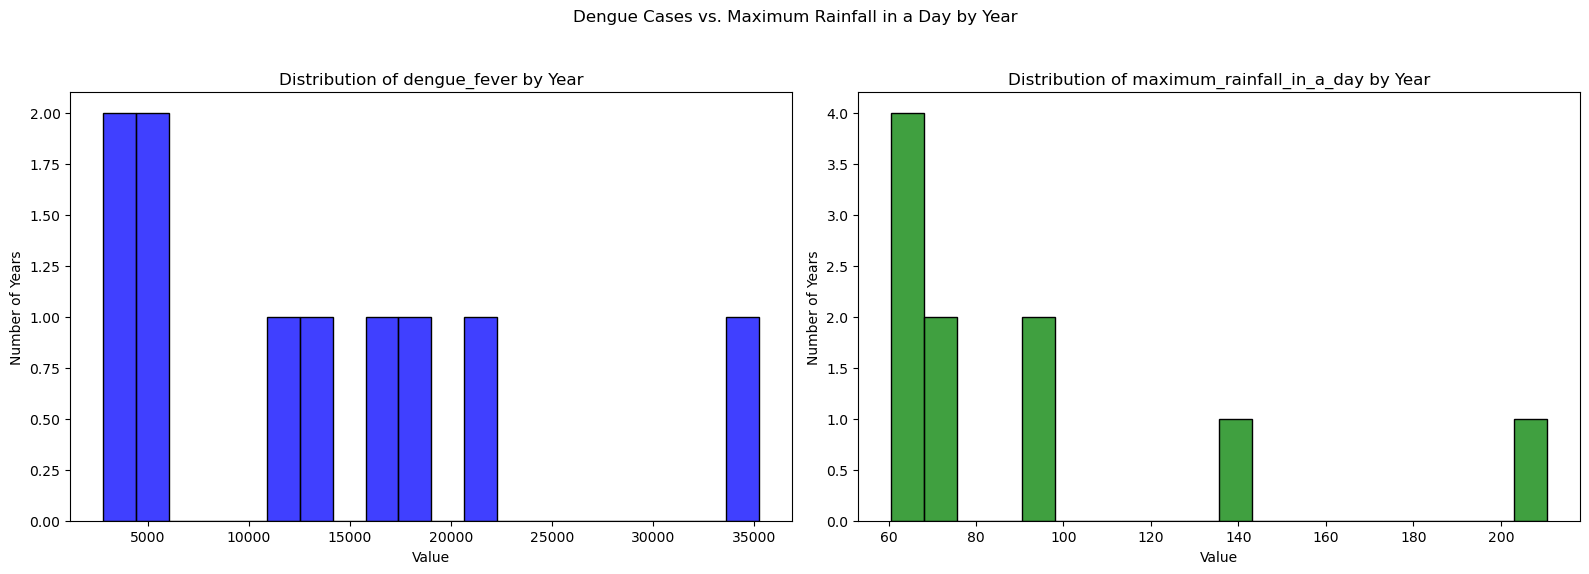

In [24]:
# Group the data by year for the visualizations
# Reload the datasets that have year information
cleaned_merged_rainfall_df = pd.read_csv(r"..\data\cleaned_merged_rainfall.csv")
cleaned_dengue_cases_df = pd.read_csv(r"..\data\cleaned_dengue_cases.csv")
cleaned_dengue_cases_by_year = cleaned_dengue_cases_df.groupby('year').sum().reset_index()
cleaned_merged_rainfall_by_year = cleaned_merged_rainfall_df.groupby('year').agg({
    'maximum_rainfall_in_a_day': 'max',
    'no_of_rainy_days': 'mean',
    'total_rainfall': 'sum'
}).reset_index()

# Merge the two datasets on the 'year' column
merged_df_by_year = pd.merge(cleaned_dengue_cases_by_year, cleaned_merged_rainfall_by_year, on='year', how='inner')

# Function to plot histograms for comparison
def plot_comparison_histograms(df, feature1, feature2, title, xlabel, ylabel):
    plt.figure(figsize=(16, 6))
    
    # Plot the first feature
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature1], bins=20, kde=False, color='blue')
    plt.title(f'Distribution of {feature1} by Year')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Plot the second feature
    plt.subplot(1, 2, 2)
    sns.histplot(df[feature2], bins=20, kde=False, color='green')
    plt.title(f'Distribution of {feature2} by Year')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Super title for both subplots
    plt.suptitle(title)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot histograms comparing Dengue Cases with Maximum Rainfall in a Day by Year
plot_comparison_histograms(merged_df_by_year, 'dengue_fever', 'maximum_rainfall_in_a_day', 'Dengue Cases vs. Maximum Rainfall in a Day by Year', 'Value', 'Number of Years')

# Histogram shows, the warmer the weather (ie. low rainfall = warmer weather) leads to higher dengue cases

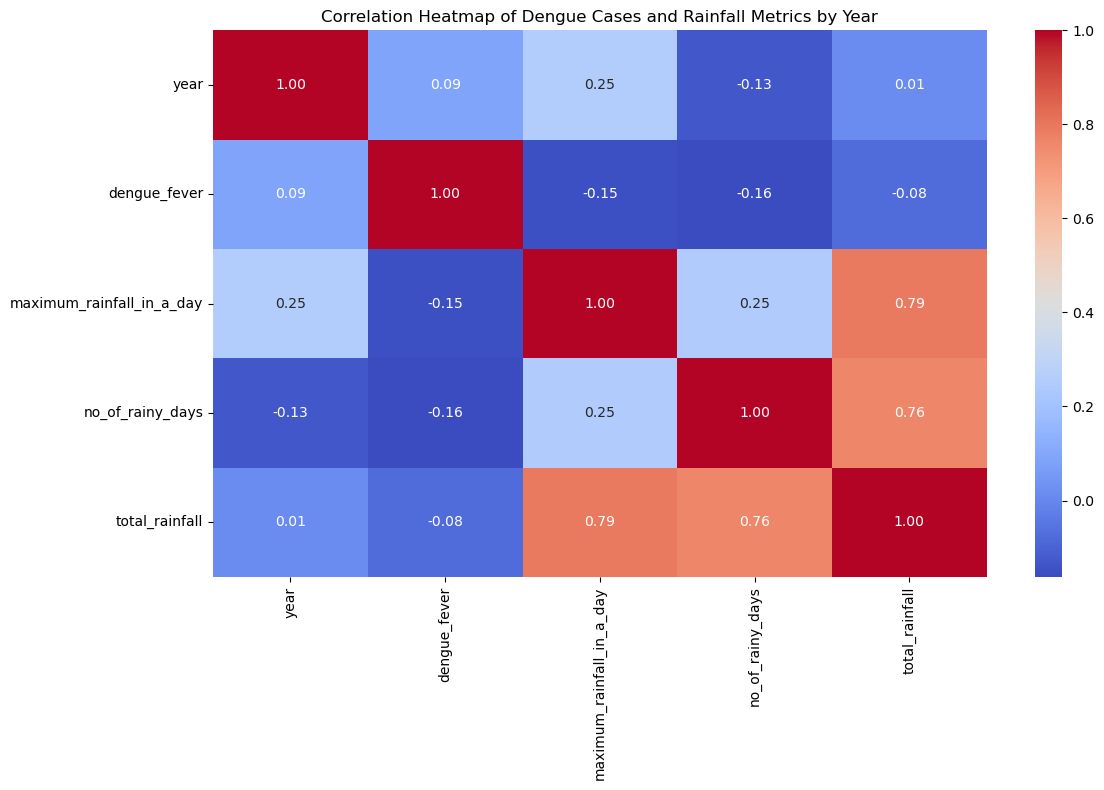

In [25]:
# Plotting the heatmap


# Merge the two datasets on the 'year' column
merged_df_by_year = pd.merge(cleaned_dengue_cases_by_year, cleaned_merged_rainfall_by_year, on='year', how='inner')

# Calculate the correlation matrix for the merged dataset grouped by year
corr_merged_by_year = merged_df_by_year.corr()

# Create heatmap for Merged Data by Year
plt.figure(figsize=(12, 8))
sns.heatmap(corr_merged_by_year, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Dengue Cases and Rainfall Metrics by Year")
plt.tight_layout()
plt.show()




#The correlation between dengue_cases and max rainfall in a day is approximately 0.03, which is very close to zero. This indicates a very weak relationship between these two variables.
#Similarly, the correlation between dengue cases and num_rainy_days is approximately -0.06, also suggesting a weak negative relationship.
#The correlation between dengue cases and total rainfall is approximately 0.01, which is almost zero, indicating no relationship.
#It's important to note that correlation does not imply causation.

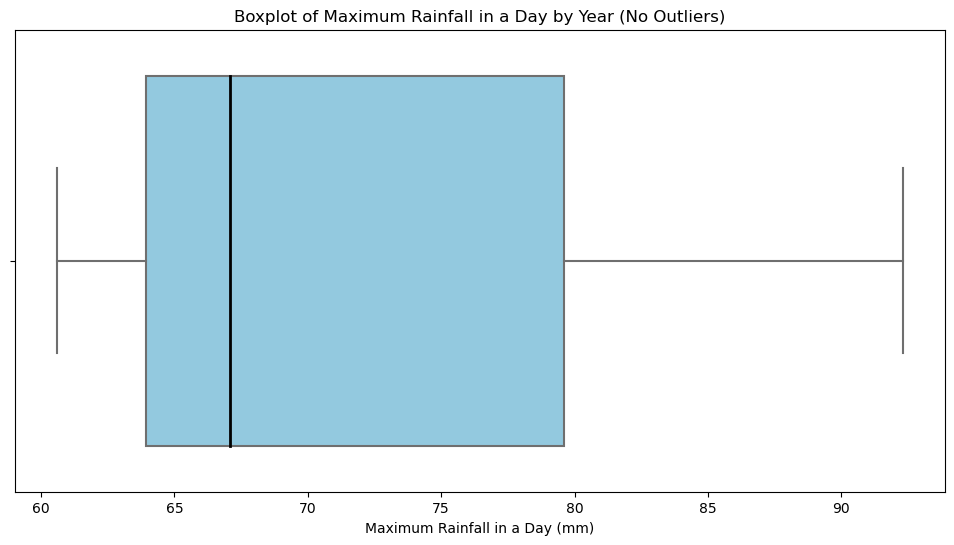

In [26]:
# Calculate the IQR for 'maximum_rainfall_in_a_day' to identify outliers
Q1 = merged_df_by_year['maximum_rainfall_in_a_day'].quantile(0.25)
Q3 = merged_df_by_year['maximum_rainfall_in_a_day'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = merged_df_by_year[(merged_df_by_year['maximum_rainfall_in_a_day'] >= lower_bound) & 
                                  (merged_df_by_year['maximum_rainfall_in_a_day'] <= upper_bound)]

# Plot horizontal boxplot for Maximum Rainfall in a Day by Year without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='maximum_rainfall_in_a_day', data=filtered_data, orient='h', color='skyblue', 
            medianprops={'color':'black', 'linewidth': 2})
plt.title('Boxplot of Maximum Rainfall in a Day by Year (No Outliers)')
plt.xlabel('Maximum Rainfall in a Day (mm)')
plt.show()

# Created heatmap because it was required.

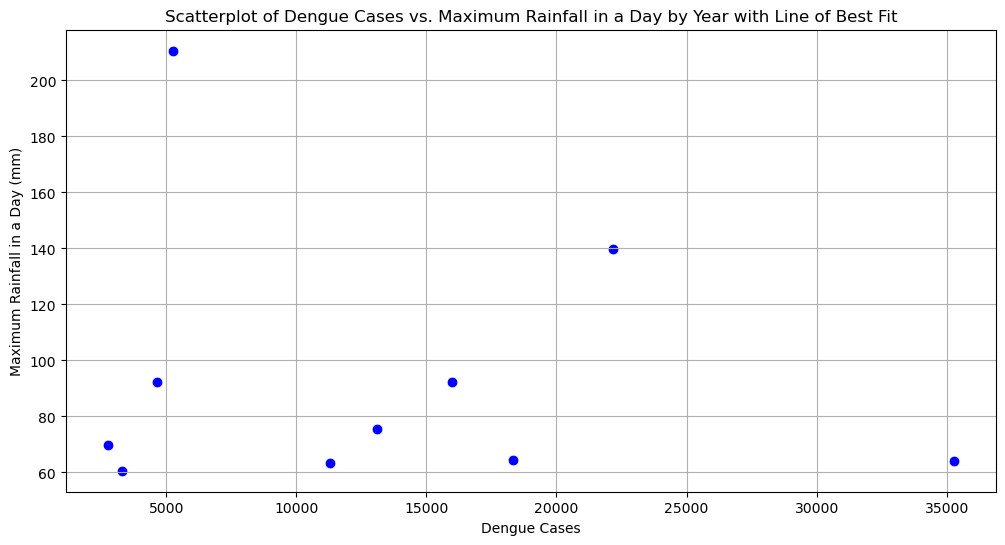

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df_by_year is your DataFrame
# merged_df_by_year = ...

plt.figure(figsize=(12, 6))

# Plot the scatter plot
sns.scatterplot(x='dengue_fever', y='maximum_rainfall_in_a_day', data=merged_df_by_year, color='blue', s=60)



plt.title('Scatterplot of Dengue Cases vs. Maximum Rainfall in a Day by Year with Line of Best Fit')
plt.xlabel('Dengue Cases')
plt.ylabel('Maximum Rainfall in a Day (mm)')
plt.grid(True)

plt.show()


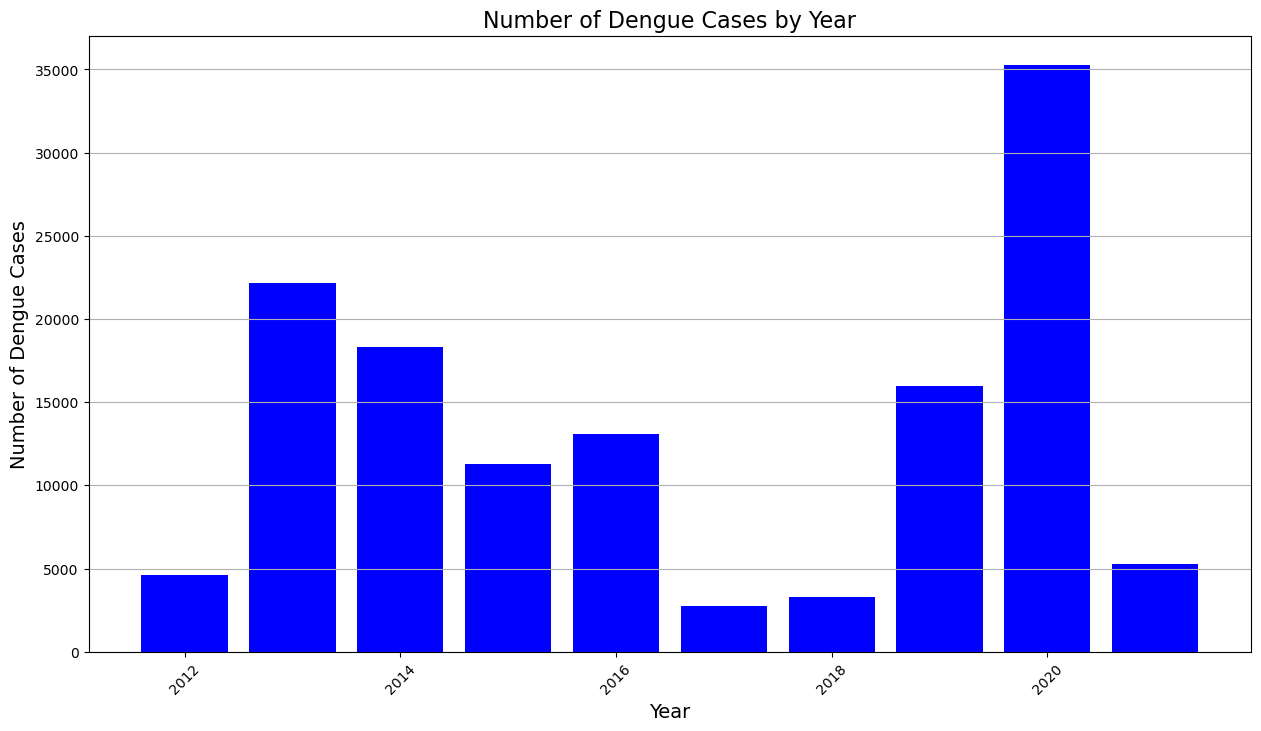

In [28]:
# Create a bar chart for the dengue cases data
plt.figure(figsize=(15, 8))
plt.bar(cleaned_dengue_cases_df['year'], cleaned_dengue_cases_df['dengue_fever'], color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Dengue Cases', fontsize=14)
plt.title('Number of Dengue Cases by Year', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.show()

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

Due to the lack of available information readily available, charts generated proven to be inconclusive. 

Further analysis can be done as more in-depth data becomes readily available. More will be shared via "README!"

README file is in project-1 folder